In [150]:
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
data = pd.read_excel("../Amazon.xlsx")
data.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


No null values, so we can start explore variables


In [42]:
data["Order ID"].value_counts()

CA-2013-165330    11
CA-2012-104346     9
CA-2014-117457     9
CA-2011-106439     9
CA-2012-164882     9
                  ..
CA-2013-152940     1
CA-2014-130715     1
CA-2014-102820     1
CA-2014-111577     1
US-2014-152002     1
Name: Order ID, Length: 1611, dtype: int64

In [43]:
data["EmailID"].value_counts()

WilliamBrown@gmail.com       24
ArthurPrichep@gmail.com      23
RickWilson@gmail.com         19
GregGuthrie@gmail.com        17
ZuschussCarroll@gmail.com    16
                             ..
JenniferJackson@gmail.com     1
SethVernon@gmail.com          1
CarolDarley@gmail.com         1
MagdeleneMorse@gmail.com      1
AndrewRoberts@gmail.com       1
Name: EmailID, Length: 686, dtype: int64

In [44]:
data["Geography"].value_counts()

United States,Los Angeles,California      747
United States,San Francisco,California    510
United States,Seattle,Washington          428
United States,San Diego,California        170
United States,Phoenix,Arizona              63
                                         ... 
United States,Davis,California              1
United States,Antioch,California            1
United States,Redwood City,California       1
United States,Pico Rivera,California        1
United States,Ontario,California            1
Name: Geography, Length: 170, dtype: int64

In [45]:
data["Category"].value_counts()

Binders        471
Paper          450
Furnishings    304
Phones         277
Storage        266
Accessories    258
Art            250
Chairs         207
Appliances     136
Labels         116
Tables         116
Bookcases       80
Fasteners       72
Supplies        69
Envelopes       67
Machines        39
Copiers         25
Name: Category, dtype: int64

In [46]:
data["Product Name"].value_counts()

Staples                                                               60
Avery Non-Stick Binders                                                8
Vinyl Sectional Post Binders                                           7
SAFCO Arco Folding Chair                                               7
Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl                        7
                                                                      ..
Telephone Message Books with Fax/Mobile Section, 5 1/2" x 3 3/16"      1
Texas Instruments TI-34 Scientific Calculator                          1
White Envelopes, White Envelopes with Clear Poly Window                1
Wilson Jones Heavy-Duty Casebound Ring Binders with Metal Hinges       1
LogitechÂ VX Revolution Cordless Laser Mouse for Notebooks (Black)     1
Name: Product Name, Length: 1494, dtype: int64

Dropping Order ID and email ID, those data looks more unique values and I think it is not going to help me find insights.

In [47]:
data =  data.drop(columns=["Order ID","EmailID"])
data.head()

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit
0,2013-06-13,2013-06-17,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,2011-06-09,2011-06-14,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,2011-06-09,2011-06-14,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,2011-06-09,2011-06-14,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,2011-06-09,2011-06-14,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [48]:
data["Order Date"]

0      2013-06-13
1      2011-06-09
2      2011-06-09
3      2011-06-09
4      2011-06-09
          ...    
3198   2013-09-30
3199   2014-02-27
3200   2014-02-27
3201   2014-02-27
3202   2014-05-05
Name: Order Date, Length: 3203, dtype: datetime64[ns]

Adding number of days taking for order date and shifting date

In [49]:
days_diff = []
for i in range(len(data)):
    day = int((data["Ship Date"][i] - data["Order Date"][i]).days)
    days_diff.append(day)

days_diff

[4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 6,
 3,
 4,
 4,
 4,
 4,
 7,
 7,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 3,
 3,
 2,
 2,
 2,
 6,
 5,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 2,
 2,
 5,
 4,
 4,
 4,
 5,
 6,
 6,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 4,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 4,
 4,
 3,
 3,
 3,
 5,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 1,
 1,
 2,
 2,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 3,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 4,
 3,
 3,
 3,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 4,
 6,
 3,
 2,
 4,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 3,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 2,
 2,
 2,
 6,
 6,
 5,
 5,
 4,
 4,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 2,
 5,
 5,
 2,
 2,
 2,
 2,
 4,
 4,
 6,
 6,
 6,
 3,


In [67]:
data = data.assign(Days_Difference = days_diff)
data.head()

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit,Days_Difference
0,2013-06-13,2013-06-17,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,4
1,2011-06-09,2011-06-14,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,5
2,2011-06-09,2011-06-14,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,5
3,2011-06-09,2011-06-14,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,5
4,2011-06-09,2011-06-14,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,5


In [69]:
data.groupby(['Category','Days_Difference']).size()

Category     Days_Difference
Accessories  0                  13
             1                  10
             2                  36
             3                  30
             4                  61
                                ..
Tables       3                  10
             4                  29
             5                  25
             6                  12
             7                  10
Length: 136, dtype: int64

In [84]:
data[data['Days_Difference']>4]

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit,Days_Difference
1,2011-06-09,2011-06-14,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,5
2,2011-06-09,2011-06-14,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,5
3,2011-06-09,2011-06-14,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,5
4,2011-06-09,2011-06-14,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,5
5,2011-06-09,2011-06-14,"United States,Los Angeles,California",Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,34.4700,5
...,...,...,...,...,...,...,...,...,...
3190,2014-10-07,2014-10-12,"United States,Chandler,Arizona",Art,Avery Hi-Liter Smear-Safe Highlighters,9.344,2,1.8688,5
3199,2014-02-27,2014-03-04,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332,5
3200,2014-02-27,2014-03-04,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.576,2,19.3932,5
3201,2014-02-27,2014-03-04,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200,5


Categorywise Product taking more than 5 days for ordering to shipping

<AxesSubplot:title={'center':'Categorywise Product taking more than 5 days for ordering to shipping'}>

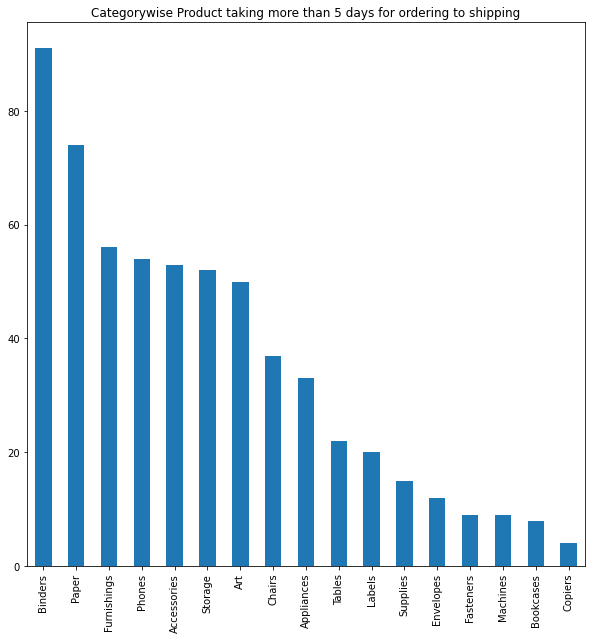

In [104]:
data[data['Days_Difference']>5]["Category"].value_counts().plot(kind='bar',figsize=(10,10),title= "Categorywise Product taking more than 5 days for ordering to shipping")

Geographywise Product taking more than 5 days for ordering to shipping

<AxesSubplot:title={'center':'Geographywise Products taking more than 5 days for ordering to shipping'}>

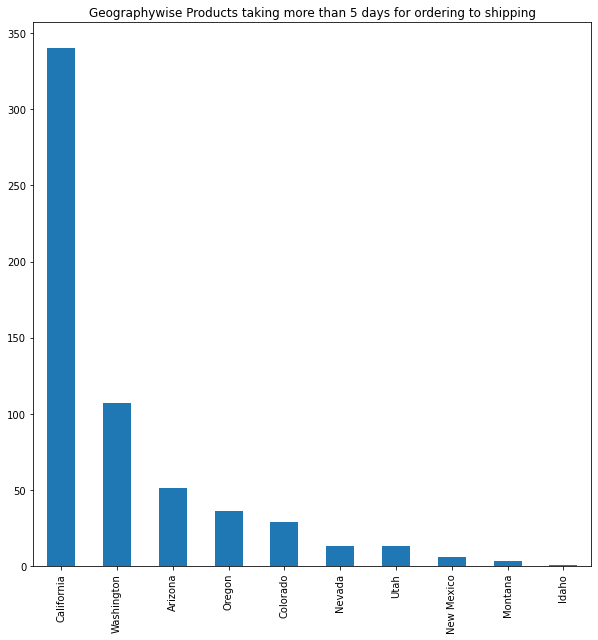

In [119]:
data[data['Days_Difference']>5]["Geography"].str.split(",").str[-1].value_counts().plot(kind='bar',figsize=(10,10),title= "Geographywise Products taking more than 5 days for ordering to shipping")

In [124]:
data["Geography"] = data["Geography"].str.split(",").str[-1]
data.head()

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit,Days_Difference
0,2013-06-13,2013-06-17,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,4
1,2011-06-09,2011-06-14,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,5
2,2011-06-09,2011-06-14,California,Art,Newell 322,7.280,4,1.9656,5
3,2011-06-09,2011-06-14,California,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,5
4,2011-06-09,2011-06-14,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,5


Geographywise Sales Percentage

<AxesSubplot:title={'center':'Geographywise Sales'}, ylabel='Sales'>

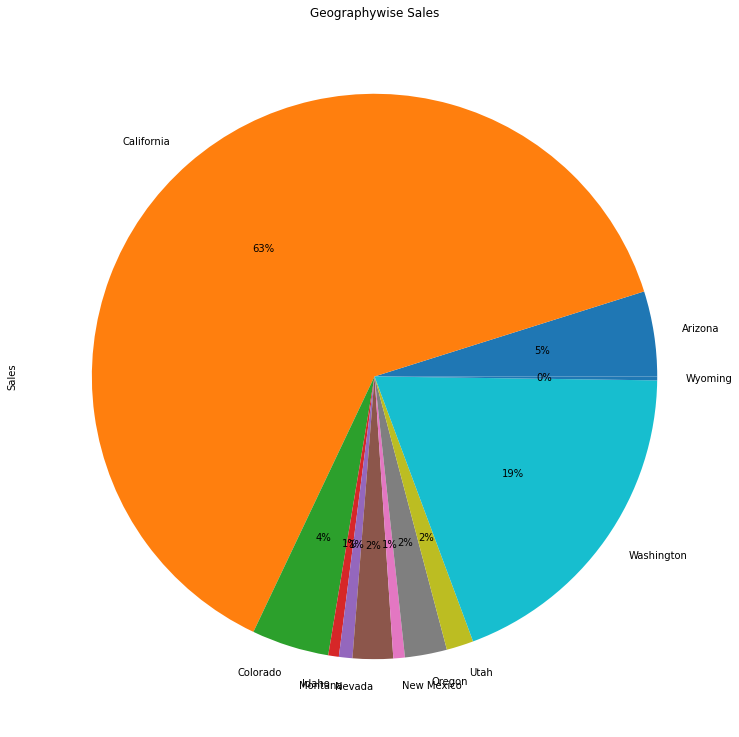

In [146]:
data.groupby('Geography')['Sales'].sum().plot(kind="pie",figsize=(13,13),title= "Geographywise Sales",autopct='%1.0f%%')

Categorywise Sales

<AxesSubplot:title={'center':'Geographywise Sales'}, ylabel='Sales'>

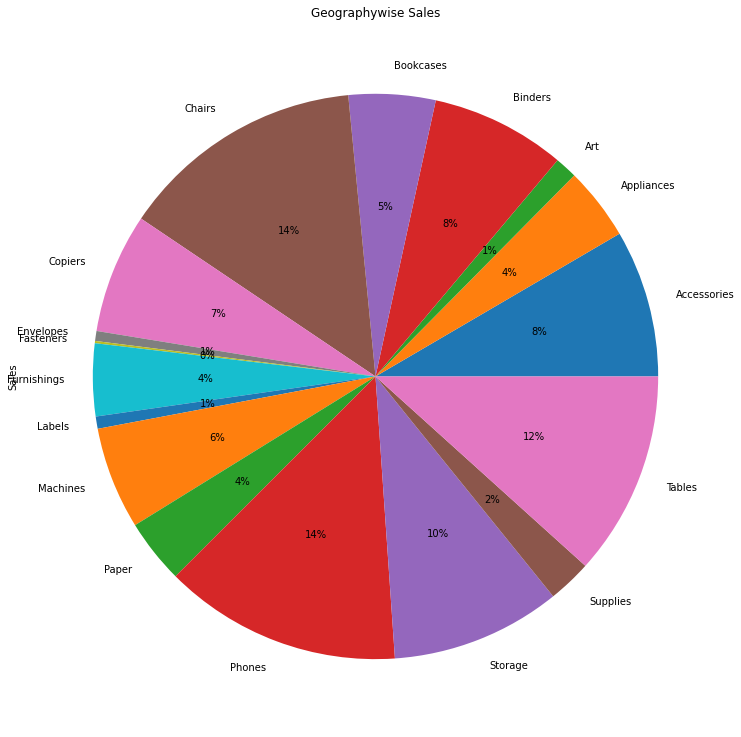

In [145]:
data.groupby('Category')['Sales'].sum().plot(kind="pie",figsize=(13,13),title= "Categorywise Sales",autopct='%1.0f%%')

In [169]:
data.groupby('Geography')['Profit'].sum()

Geography
Arizona       -3427.9246
California    76381.3871
Colorado      -6527.8579
Idaho           826.7231
Montana        1833.3285
Nevada         3316.7659
New Mexico     1157.1161
Oregon        -1190.4705
Utah           2546.5335
Washington    33402.6517
Wyoming         100.1960
Name: Profit, dtype: float64

There are negative values in this Profits, We use bar chart for distinguise. Geographywise Profit

<BarContainer object of 11 artists>

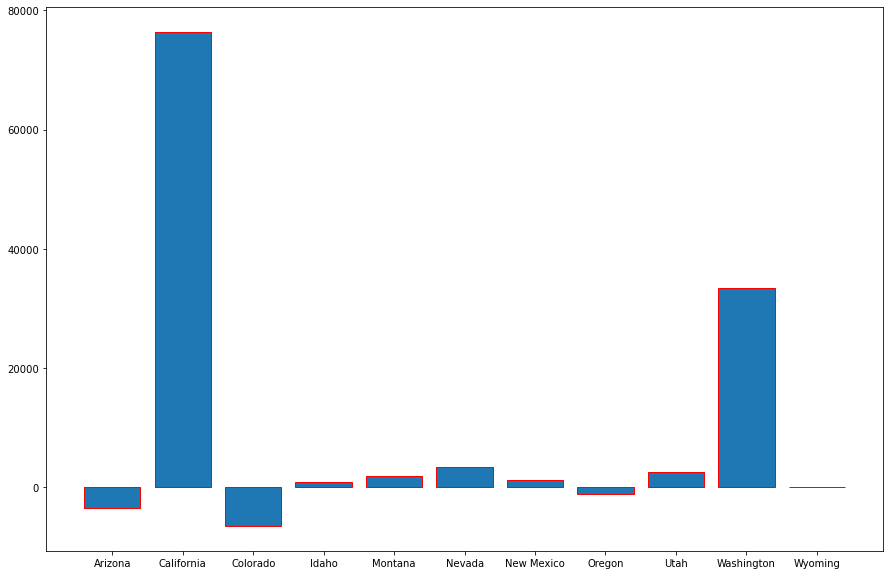

In [176]:
fig = plt.figure(figsize = (15, 10))
plt.bar(data.groupby('Geography')['Profit'].sum().keys(),data.groupby('Geography')['Profit'].sum(),edgecolor="red")

Categorywise Profit

<BarContainer object of 17 artists>

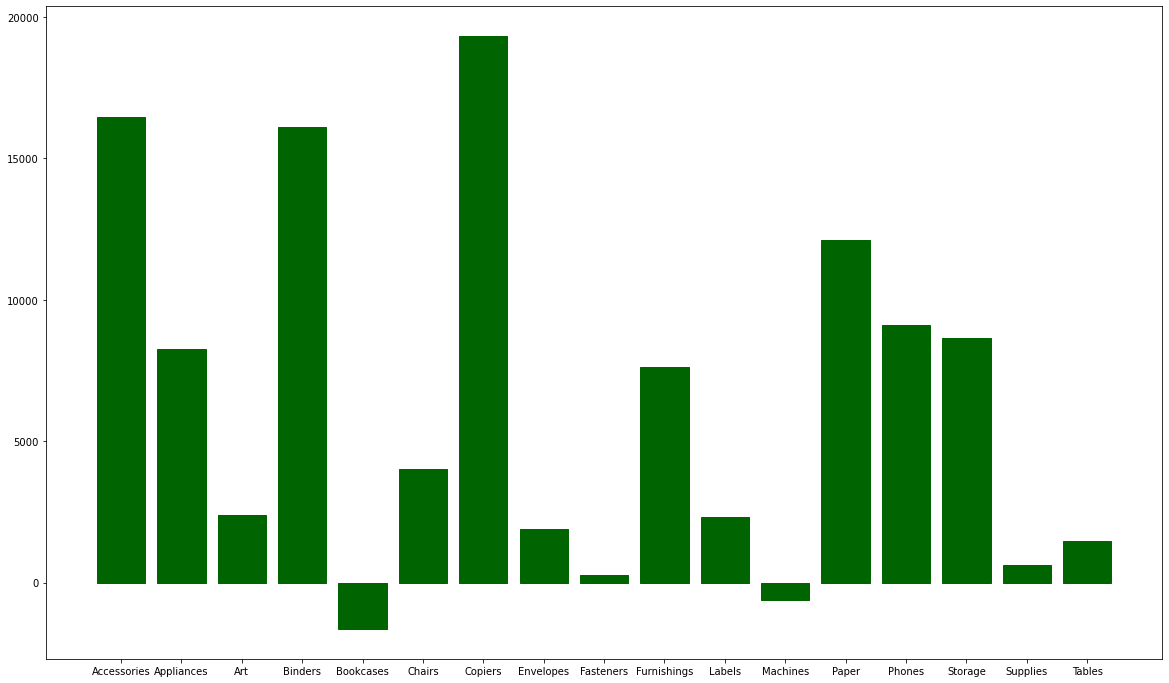

In [191]:
fig = plt.figure(figsize = (20, 12))
plt.bar(data.groupby('Category')['Profit'].sum().keys(),data.groupby('Category')['Profit'].sum(),color="darkgreen",edgecolor="darkgreen")